### How to measure a deformation **field** ?

Until now me measured a **single** deformation function that performs a **homogeneous** mapping of the material points from one configuration to the other.<br>

$ \hspace{1.5cm} \eta(Φ)^2 = \displaystyle \sum_{x\in\Omega}(g(Φ.x) - f(x))^2$

---
 Integration zone Ω!

### Let's define our intergration zones
We can create a **grid** of points in our reference image:

<center>
    
<img src="https://ttk.gricad-pages.univ-grenoble-alpes.fr/spam/_images/regularGridSmall.png" width="320" height="320" />

### Let's check the `spam-ldic` output **fields**


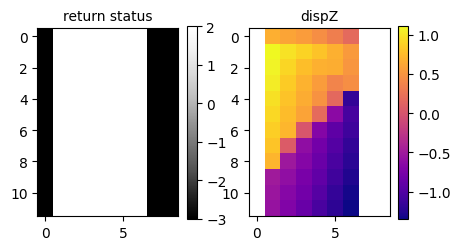

In [6]:
import tifffile
import matplotlib.pyplot as plt
RS    = tifffile.imread("./media/VEC4-01-b2-VEC4-02-b2-ldic-returnStatus-ns30.tif") # load return status field
dispZ = tifffile.imread("./media/VEC4-01-b2-VEC4-02-b2-ldic-Zdisp-ns30.tif") # load Z displacement field

plt.figure(figsize=(5, 5))
plt.subplot(1,2,1)
plt.title("return status", fontsize=10)
plt.imshow(RS[:, RS.shape[1]//2], cmap="Greys_r", vmin=-3, vmax=2); plt.colorbar(shrink=0.5)
plt.subplot(1,2,2)
plt.title("dispZ", fontsize=10)
plt.imshow(dispZ[:, dispZ.shape[1]//2], cmap="plasma"); plt.colorbar(shrink=0.5)
plt.show()

### Different node spacing? `spam-passPhiField`

Quite handy for a coarse-fine approach!

> spam-passPhiField -pf VEC4-01-b2-VEC4-02-b2-ldic.tsv -im1 ../VEC4-01-b2.tif -ns 16

> spam-ldic VEC4-01-b2.tif VEC4-02-b2.tif -pf ./hws15-ns30/VEC4-01-b2-VEC4-02-b2-ldic-passed-ns16.tsv -glt 20000 -tif -vtk -hws 8 -ns 16 -od ./hws8-ns16

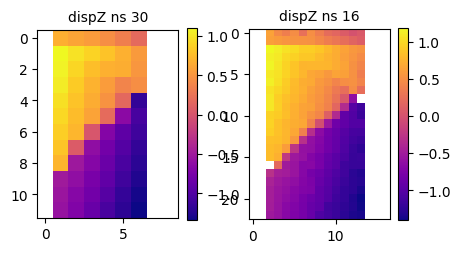

In [21]:
dispZ1 = tifffile.imread("./media/VEC4-01-b2-VEC4-02-b2-ldic-Zdisp-ns30.tif") 
dispZ2 = tifffile.imread("./media/VEC4-01-b2-VEC4-02-b2-ldic-Zdisp-ns16.tif") 

plt.figure(figsize=(5, 5))
plt.subplot(1,2,1)
plt.title("dispZ ns 30", fontsize=10)
plt.imshow(dispZ1[:, dispZ1.shape[1]//2], cmap="plasma"); plt.colorbar(shrink=0.5)
plt.subplot(1,2,2)
plt.title("dispZ ns 16", fontsize=10)
plt.imshow(dispZ2[:, dispZ2.shape[1]//2], cmap="plasma"); plt.colorbar(shrink=0.5)
plt.show()

### What about the case where an average initial case is not sufficient? 
Best example is a **crack**:

<center>
    
<img src="https://spam-project.gitlab.io/spam/_images/psInput.png" width="520" height="520" />

### Brutal force `spam-pixelSearch`

 - Forget about (Φ), (η) and iterative algorithms here
 - But keep the intergration zone idea Ω
 - Search in 3D for best correlation displacement vector 

 <img width="550px" src="media/ps-sketch.png"/>

### What's the idea behind `spam-pixelSearch` ?

 - Compute Correlation Coefficient (similarity measurement)
 - Only interger displacement

 <img width="550px" src="media/ps-CC.png"/>

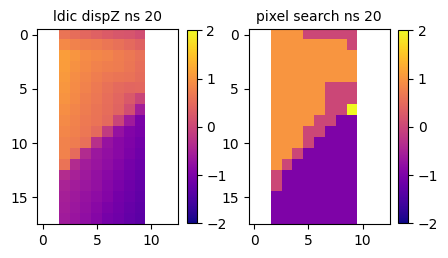

In [32]:
dispZ1 = tifffile.imread("./media/VEC4-01-b2-VEC4-02-b2-ldic-Zdisp-ns20.tif") 
dispZ2 = tifffile.imread("./media/VEC4-01-b2-VEC4-02-b2-pixelSearch-Zdisp.tif") 

plt.figure(figsize=(5, 5))
plt.subplot(1,2,1)
plt.title("ldic dispZ ns 20", fontsize=10)
plt.imshow(dispZ1[:, 9], cmap="plasma", vmin=-2, vmax=2); plt.colorbar(shrink=0.5)
plt.subplot(1,2,2)
plt.title("pixel search ns 20", fontsize=10)
plt.imshow(dispZ2[:, 9], cmap="plasma", vmin=-2, vmax=2); plt.colorbar(shrink=0.5)
plt.show()